# NN & DeepLearning_Lesson: Autoencoders

Below is the code that we added hidden layer to the encoder

In [13]:
from keras.layers import Input, Dense
from keras.models import Model

# This is the size of our encoded representation
encoding_dim = 32 

input_img = Input(shape=(784,))
encoded1 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)

# "decoded" is the lossy reconstruction of the input
decoded1 = Dense(128, activation='relu')(encoded2)
decoded2 = Dense(784, activation='sigmoid')(decoded1)

autoencoder = Model(input_img, decoded2)
encoder = Model(input_img, encoded2)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer2(decoder_layer1(encoded_input)))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics =['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history =autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.3691 - acc: 0.4915 - val_loss: 0.3144 - val_acc: 0.5019
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.3040 - acc: 0.5058 - val_loss: 0.3009 - val_acc: 0.5039
Epoch 3/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.2960 - acc: 0.5067 - val_loss: 0.2954 - val_acc: 0.5048
Epoch 4/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.2918 - acc: 0.5072 - val_loss: 0.2921 - val_acc: 0.5053
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.2888 - acc: 0.5076 - val_loss: 0.2900 - val_acc: 0.5052


Prediction and result analysis of the encoder after the hidden layer is added

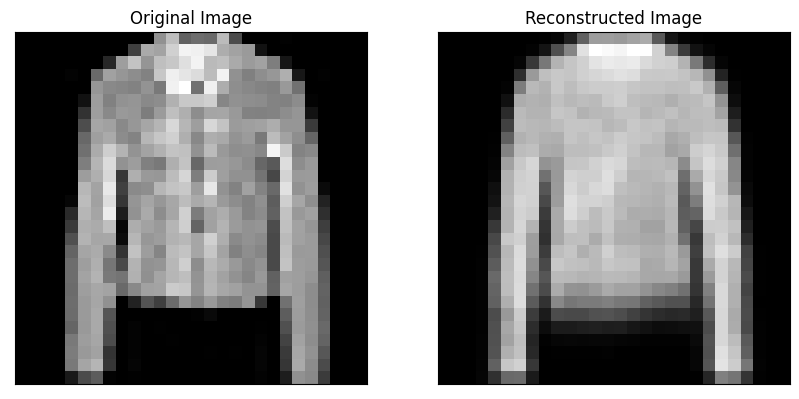

In [5]:
import matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_imgs = autoencoder.predict(x_test)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Original Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()

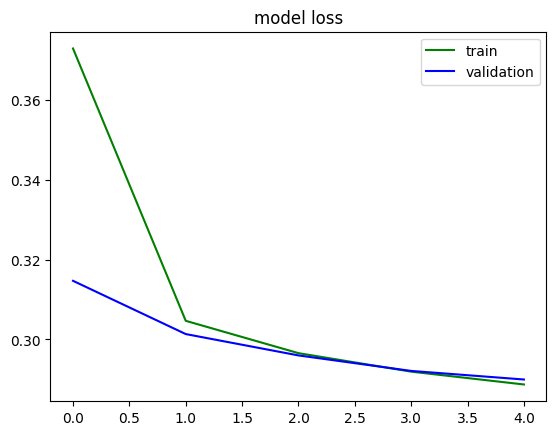

In [6]:
# graph
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="blue")
plt.title('model loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Now we tried adding the noise and denoising for the encoder

In [8]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics =['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.4206 - acc: 0.4812 - val_loss: 0.3405 - val_acc: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3385 - acc: 0.5009 - val_loss: 0.3125 - val_acc: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3233 - acc: 0.5036 - val_loss: 0.2972 - val_acc: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.3150 - acc: 0.5049 - val_loss: 0.2871 - val_acc: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.3101 - acc: 0.5056 - val_loss: 0.2800 - val_acc: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3069 - acc: 0.5060 - val_loss: 0.2752 - val_acc: 0.0000e+00
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3049 - acc: 0.5062 - va

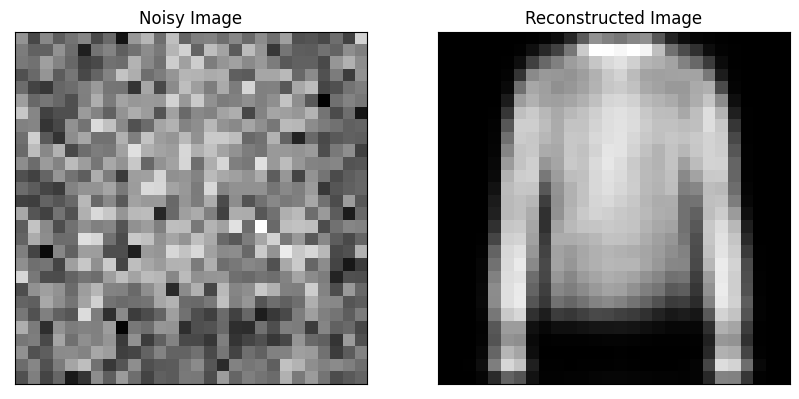

In [9]:

import matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original noisy image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Noisy Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()

Visualization of the accuracy and loss after the training of the encoder

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.2984 - acc: 0.5067 - val_loss: 0.2586 - val_acc: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.2983 - acc: 0.5067 - val_loss: 0.2588 - val_acc: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2983 - acc: 0.5067 - val_loss: 0.2586 - val_acc: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2983 - acc: 0.5067 - val_loss: 0.2587 - val_acc: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2983 - acc: 0.5067 - val_loss: 0.2585 - val_acc: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2982 - acc: 0.5067 - val_loss: 0.2587 - val_acc: 0.0000e+00
Epoch 7/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2982 - acc: 0.5067 - va

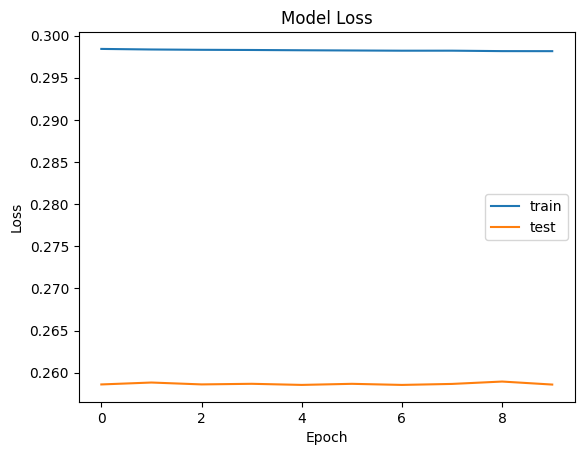

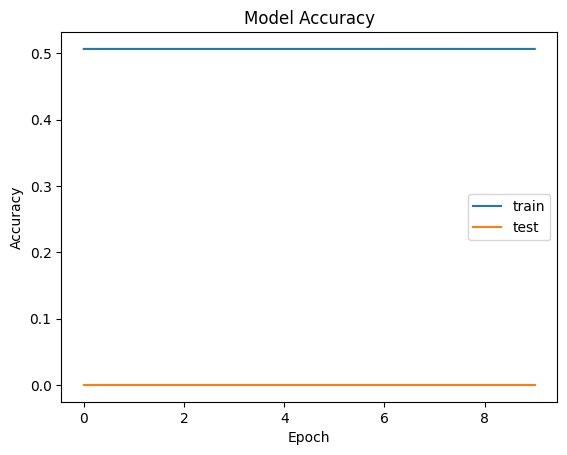

In [12]:
import matplotlib.pyplot as plt

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()